In [1]:
import tensorflow as tf
tf.__version__

'2.19.0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pwd

'/content'

In [4]:
cd/content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [5]:
pwd

'/content/drive/MyDrive/ML'

In [6]:
ls

CNN.ipynb


In [7]:
link = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'

In [8]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=835822f20300bc3aedfe81f737b2179d3ba34b985f58d08fc4745451bb5800bc
  Stored in directory: /root/.cache/pip/wheels/01/46/3b/e29ffbe4ebe614ff224bad40fc6a5773a67a163251585a13a9
Successfully built wget


In [9]:
import wget

In [10]:
wget.download(link)

'traffic-signs-data.zip'

thu muc giai nen

In [11]:
data="./"

In [12]:
!unzip -q traffic-signs-data.zip -d $data

tao duong dan cua cac file sau khi giai nen

In [13]:
train_link = data+"train.p"
valid_link = data + "valid.p"
test_link=data+"test.p"

In [14]:
import pickle

In [15]:
with open(train_link,mode="rb") as f:
  train = pickle.load(f)

In [16]:
with open(valid_link,mode="rb") as f:
  valid = pickle.load(f)

In [17]:
with open(test_link,mode="rb") as f:
  test = pickle.load(f)

In [18]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
  

In [19]:
trainX=train["features"]
trainY=train["labels"]

In [20]:
trainX.shape # buc anh chia lam 3 lop, co chieu la 32x32

(34799, 32, 32, 3)

In [21]:
trainX[0].shape

(32, 32, 3)

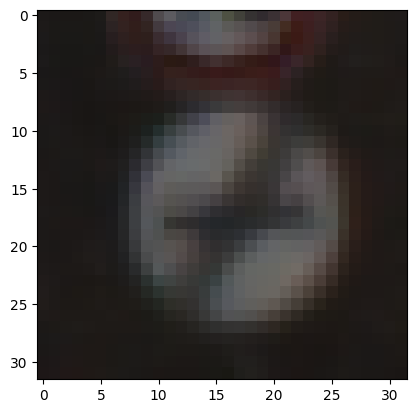

In [22]:
import matplotlib.pyplot as plt
plt.imshow(trainX[0])


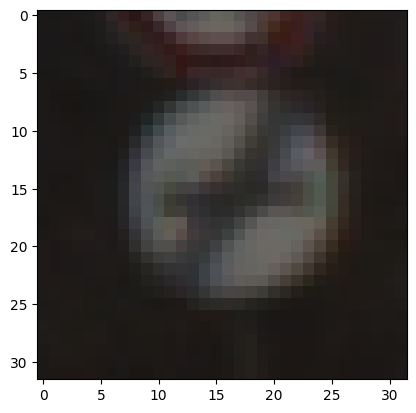

In [23]:
plt.imshow(trainX[1])


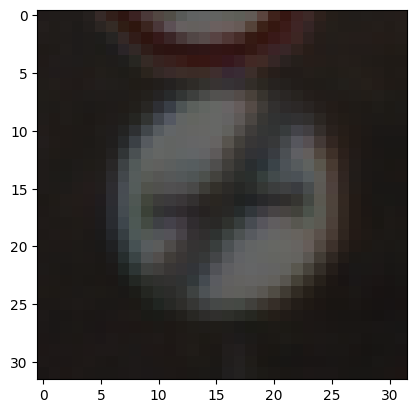

In [24]:
plt.imshow(trainX[10])


In [25]:
trainY[1]

np.uint8(41)

In [26]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [27]:
classNames[trainY[50]]

'End of no passing'

In [28]:
from sklearn.utils import shuffle
trainX,trainY = shuffle(trainX,trainY)


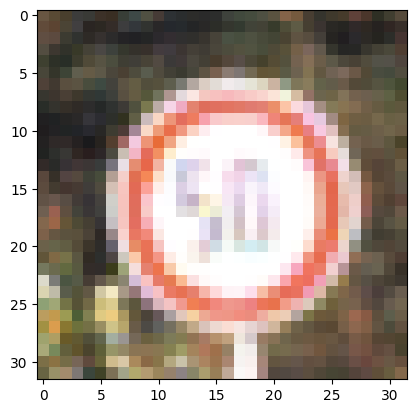

In [29]:
plt.imshow(trainX[10])

In [30]:
validX=valid["features"]
validY=valid["labels"]


In [31]:
testX=test["features"]
testY=test["labels"]

chuan hoa

In [32]:
trainX = trainX.astype(float)/255.0
validX = validX.astype(float)/255.0
testX = testX.astype(float)/255.0

In [33]:
trainX[0]

array([[[0.36078431, 0.40392157, 0.5254902 ],
        [0.36078431, 0.41960784, 0.52941176],
        [0.42745098, 0.4745098 , 0.57647059],
        ...,
        [0.09411765, 0.09019608, 0.10588235],
        [0.09411765, 0.09803922, 0.10588235],
        [0.09803922, 0.10196078, 0.10980392]],

       [[0.25882353, 0.28235294, 0.35686275],
        [0.26666667, 0.31372549, 0.36078431],
        [0.30196078, 0.32941176, 0.36862745],
        ...,
        [0.09411765, 0.09411765, 0.10196078],
        [0.09411765, 0.09411765, 0.10196078],
        [0.09803922, 0.09803922, 0.10980392]],

       [[0.19607843, 0.19607843, 0.22745098],
        [0.17647059, 0.21176471, 0.22745098],
        [0.20784314, 0.21960784, 0.23921569],
        ...,
        [0.09411765, 0.09019608, 0.10588235],
        [0.09019608, 0.09019608, 0.09411765],
        [0.09019608, 0.09019608, 0.10588235]],

       ...,

       [[0.07843137, 0.07843137, 0.09411765],
        [0.07843137, 0.07843137, 0.08627451],
        [0.07843137, 0

In [34]:
from sklearn.preprocessing import LabelBinarizer

In [115]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
validY = lb.transform(validY)
testY = lb.transform(testY)

In [36]:
trainY=lb.fit_transform(trainY)

In [37]:
validY=lb.fit_transform(validY)

In [38]:
trainY[4]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

danh sach thu vien su dung

In [72]:
model = Sequential()

In [41]:
width = 32
height = 32
classes = 43

# so lieu channel = kernal dau ra

# VGG 16

In [118]:
from tensorflow.keras import backend as K
K.clear_session()


In [123]:
model = Sequential()

shape = (32, 32, 3)

model.add(Conv2D(32,(3,3),padding='same',input_shape=shape))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(43, activation='softmax'))


In [73]:
model.add(Conv2D(32,(3,3),padding='same',input_shape=shape))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
model.add(Activation('relu'))

In [75]:
model.add(BatchNormalization()) # chuan hoa lai neu qua lon

In [76]:
model.add(Conv2D(32,(3,3),padding='same'))

In [77]:
model.add(Activation('relu'))

In [79]:
model.add(BatchNormalization()) # chuan hoa lai neu qua lon

In [80]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [81]:
model.add(Conv2D(64,(3,3),padding='same'))

In [82]:
model.add(Activation('relu'))

In [83]:
model.add(BatchNormalization()) # chuan hoa lai neu qua lon

In [84]:
model.add(Conv2D(64,(3,3),padding='same'))

In [85]:
model.add(Activation('relu'))

In [86]:
model.add(BatchNormalization()) # chuan hoa lai neu qua lon

In [88]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [91]:
model.add(Flatten())

chuyen tu 4096 -> 52 dung dense

In [96]:
model.add(Dense(52))

In [97]:
model.add(Activation('relu'))

In [102]:
model.add(Dense(classes))

In [103]:
model.add(Activation('softmax'))

In [124]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 43)             │        22,059 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186,059 (8.34 MB)

 Trainable params: 2,185,675 (8.34 MB)

 Non-trainable params: 384 (1.50 KB)

In [105]:
aug = ImageDataGenerator(rotation_range=0.18,zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)

toc do hoc

In [106]:
learning_rate = 0.01

In [107]:
epochs = 10
#epoch
#steps
# chay 1 phan data
batch_size = 64

In [109]:
opt = SGD(learning_rate=learning_rate,momentum=0.9) # momentum de tao 1 quan tinh co the vuot qua duoc doan doc

In [126]:
model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [127]:
print("start training")


H = model.fit(
    aug.flow(trainX, trainY, batch_size=batch_size),
    validation_data=(validX, validY),
    steps_per_epoch=trainX.shape[0] // batch_size,
    epochs=epochs,
    verbose=1
)


start training
Epoch 1/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.2669 - loss: 2.7215 - val_accuracy: 0.4270 - val_loss: 2.0092
Epoch 2/10
  1/543 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5938 - loss: 1.1909

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.5938 - loss: 1.1909 - val_accuracy: 0.4245 - val_loss: 2.0520
Epoch 3/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 21s 39ms/step - accuracy: 0.6583 - loss: 1.0238 - val_accuracy: 0.5730 - val_loss: 1.6001
Epoch 4/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8438 - loss: 0.4857 - val_accuracy: 0.5698 - val_loss: 1.6290
Epoch 5/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8185 - loss: 0.5323 - val_accuracy: 0.7066 - val_loss: 1.0768
Epoch 6/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - accuracy: 0.9219 - loss: 0.2347 - val_accuracy: 0.7036 - val_loss: 1.0893
Epoch 7/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 23s 42ms/step - accuracy: 0.8992 - loss: 0.2957 - val_accuracy: 0.7576 - val_loss: 1.0988
Epoch 8/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.9062 - loss: 0.2107 - val_accuracy: 0.7603 - val_loss: 1.1171
Epoch 9/10
543/543 ━━━━━━━━━━━━━━━━━━━━ 22s 40ms/step - accuracy: 0.9338 - loss: 0.1975 - val_accurac

In [134]:
# Save model theo format mới
model.save('cnn_trans.keras')

# Load lại model
from tensorflow.keras.models import load_model
saved_model = load_model('cnn_trans.keras')


In [135]:
result = saved_model.predict(testX[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [136]:
result

array([[6.78776857e-08, 9.99997616e-01, 2.10306839e-09, 4.42325137e-15,
        8.40330930e-11, 2.18641480e-06, 4.43346609e-10, 4.61706201e-10,
        2.62774358e-10, 6.57936151e-18, 1.41432504e-19, 2.51153417e-12,
        3.04265225e-15, 2.51755997e-18, 5.96802143e-17, 5.89914152e-18,
        4.39850933e-11, 6.07625992e-19, 6.34437558e-10, 2.81806723e-13,
        1.47005563e-13, 2.29125094e-10, 3.77877156e-18, 2.01456229e-13,
        3.89946919e-09, 3.52094012e-14, 1.26848160e-16, 1.33051235e-11,
        3.56928842e-09, 1.43339943e-13, 5.06234865e-13, 9.56967448e-16,
        7.83026056e-16, 1.07196552e-11, 1.18531690e-13, 3.37267567e-13,
        5.14635990e-12, 7.93995980e-08, 1.38792311e-10, 5.18168475e-14,
        1.22201316e-12, 5.38093816e-15, 1.79780683e-13]], dtype=float32)

In [137]:
import numpy as np

In [138]:
final= np.argmax(result)

In [139]:
final = classNames[final]

In [140]:
final

'Speed limit (30km/h)'

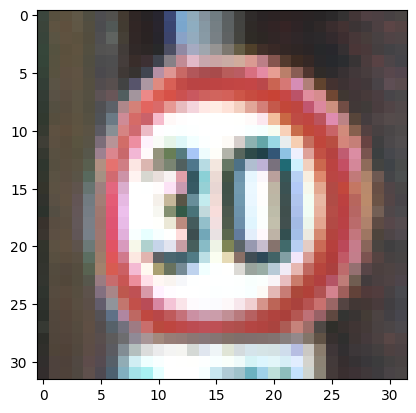

In [142]:
plt.imshow(test['features'][1])

In [145]:
result = saved_model.predict(testX[100:101])
final= np.argmax(result)
final = classNames[final]
final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


'Speed limit (30km/h)'

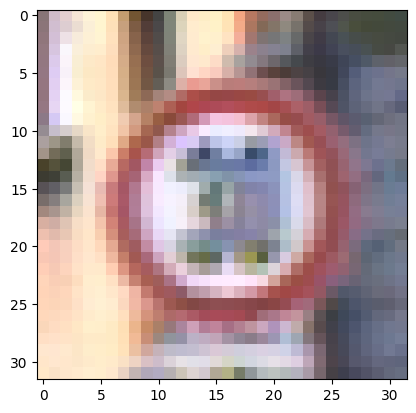

In [146]:
plt.imshow(test['features'][100])

In [149]:
result = saved_model.predict(testX[400:401])
final= np.argmax(result)
final = classNames[final]
final

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


'Keep right'

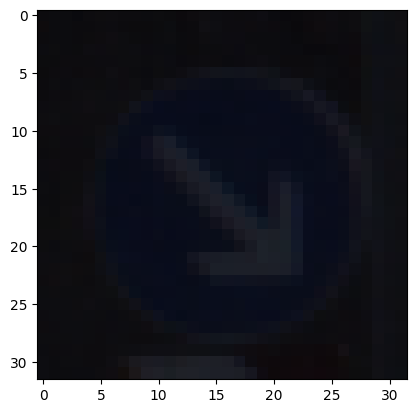

In [150]:
plt.imshow(test['features'][400])